In [4]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the dataset
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In this dataset 7043 rows and 21 columns.

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

some are object some are float.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%,75% and 50% distribution is not proper.

75% customers have tenure less than 55 months.



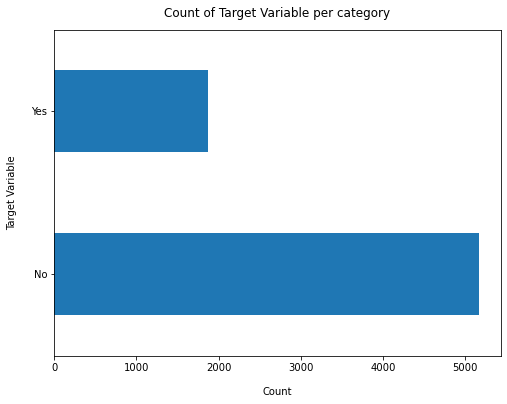

In [10]:
df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target Variable',labelpad=14)
plt.title('Count of Target Variable per category',y=1.02);

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced,ratio = 73:27,So we analyse the data with other features while talking the target values separately to get some insights.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values in this dataset.

# Data Cleaning

In [14]:
#Total Charges should be numeric amount.Let's convert it to numeriacl data type
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors ='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column.Let's check these records.

In [15]:
df.loc[df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# Missing value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%,it is safe to ignore them from further processing.

In [16]:
#Removing missing values
df.dropna(how ='any',inplace =True)

Divide customers into bins based on tenure e.g. for tenure<12 months: assign a tenure group if 1-12,for tenure between 1 to 2yrs,tenure group of 13-24; so on..

In [17]:
#Get the max tenure
print(df['tenure'].max())

72


In [18]:
#Group the tenure in bins of 12 months
labels = ['{0} -{1}'.format(i, i+11) for i in range(1,72,12)]

df['tenure_group'] = pd.cut(df.tenure,range(1,80,12), right=False, labels=labels)

In [19]:
df['tenure_group'].value_counts()

1 -12     2175
61 -72    1407
13 -24    1024
25 -36     832
49 -60     832
37 -48     762
Name: tenure_group, dtype: int64

# Remove columns not required for processing

In [20]:
#Drop column customerID and tenure
df.drop(columns=['customerID','tenure'], axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 -12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 -36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 -12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 -48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 -12


# Data Exploration

Plot distribution of individual predictors by churn 

# Univariate Analysis

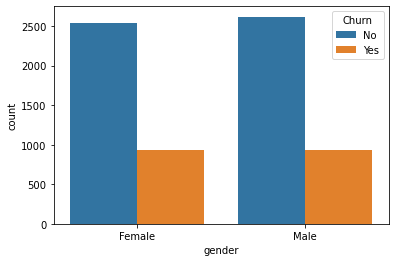

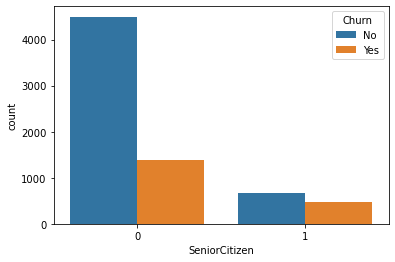

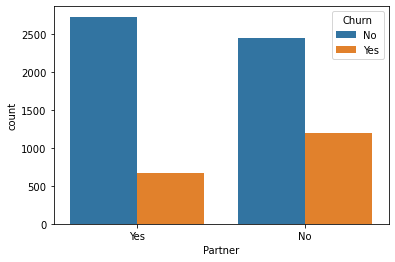

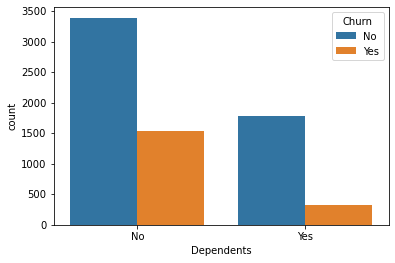

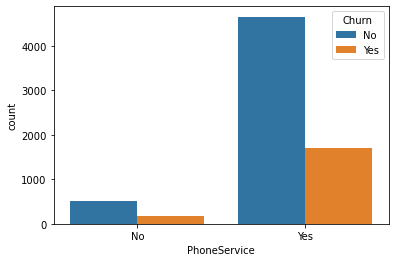

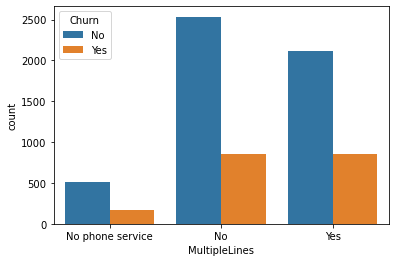

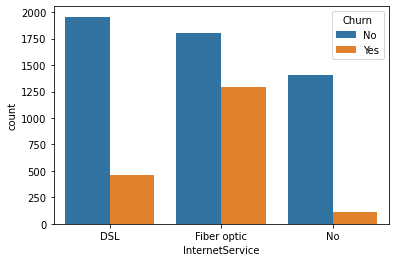

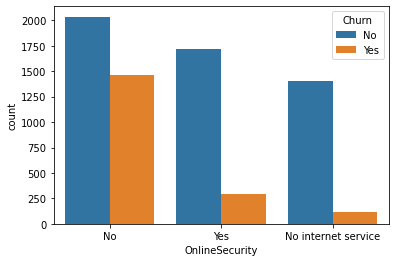

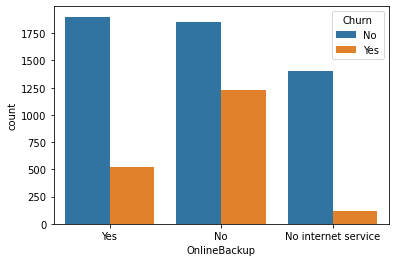

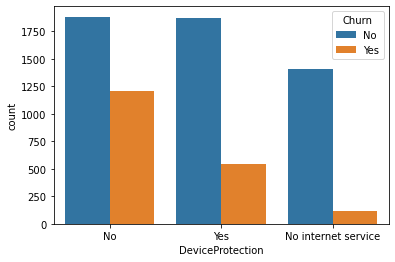

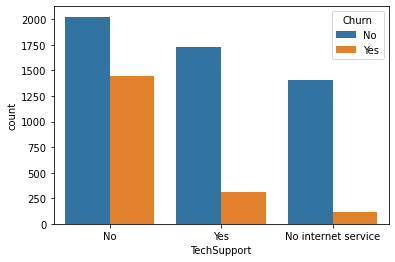

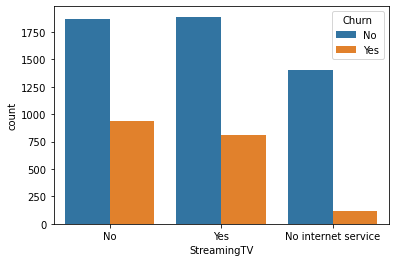

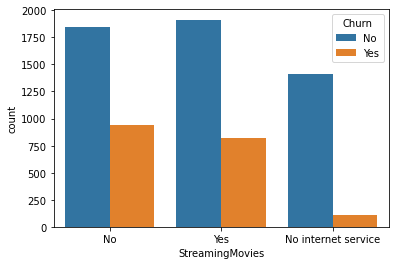

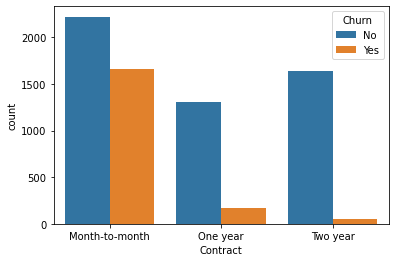

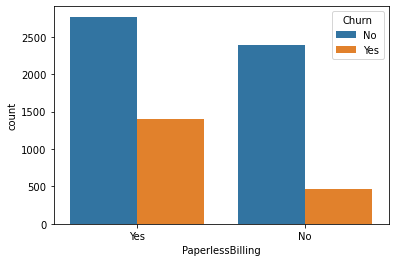

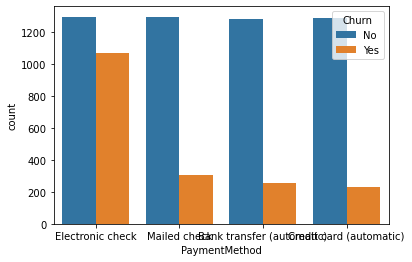

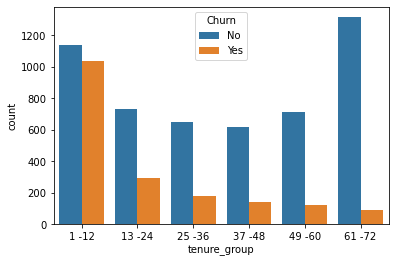

In [21]:
for i, predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

1.Electronic check medium are the highest churners.

2.Contract type -Monthly customers are more likely to churn because of no contract terms,as they are free to go customers.

3.No Online security,No Tech Support category are high churners.

4.Non senior Cotizens are high churners.

Convert the target variable 'Churn' in a binary numeric variable yes=1,no=0

In [22]:
df['Churn'] =np.where(df.Churn=='Yes',1,0)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 -12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 -36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 -12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 -48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 -12


Convert all the categorical variable into dummy variable.

In [24]:
df_dummies =pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 -12,tenure_group_13 -24,tenure_group_25 -36,tenure_group_37 -48,tenure_group_49 -60,tenure_group_61 -72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

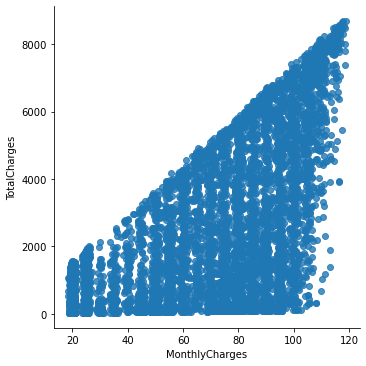

In [25]:
sns.lmplot(data=df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

Total Charges increase as Monthly Charges increse as expected.

Churn by Monthly Charges and Total Charges.

Text(0.5, 1.0, 'Monthly charges by Churn')

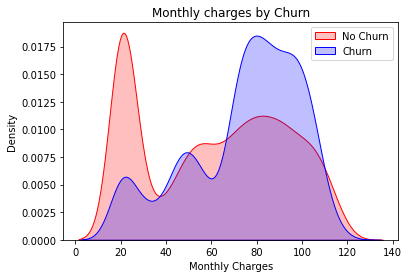

In [26]:
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)],
                 color='Red',shade=True)
mth =sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==1)],
                ax =mth,color='Blue',shade=True)
mth.legend(['No Churn','Churn'],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly charges by Churn')

Churn is high when Monthly Charges are high.

Text(0.5, 1.0, 'Total charges by Churn')

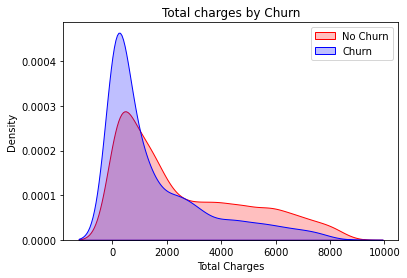

In [27]:
tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn']==0)],
                 color='Red',shade=True)
tot =sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==1)],
                ax =tot,color='Blue',shade=True)
tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total charges by Churn')

As higher Churn at lower Total Charges.

Build the corelation of all predoictors with Churn.

<AxesSubplot:>

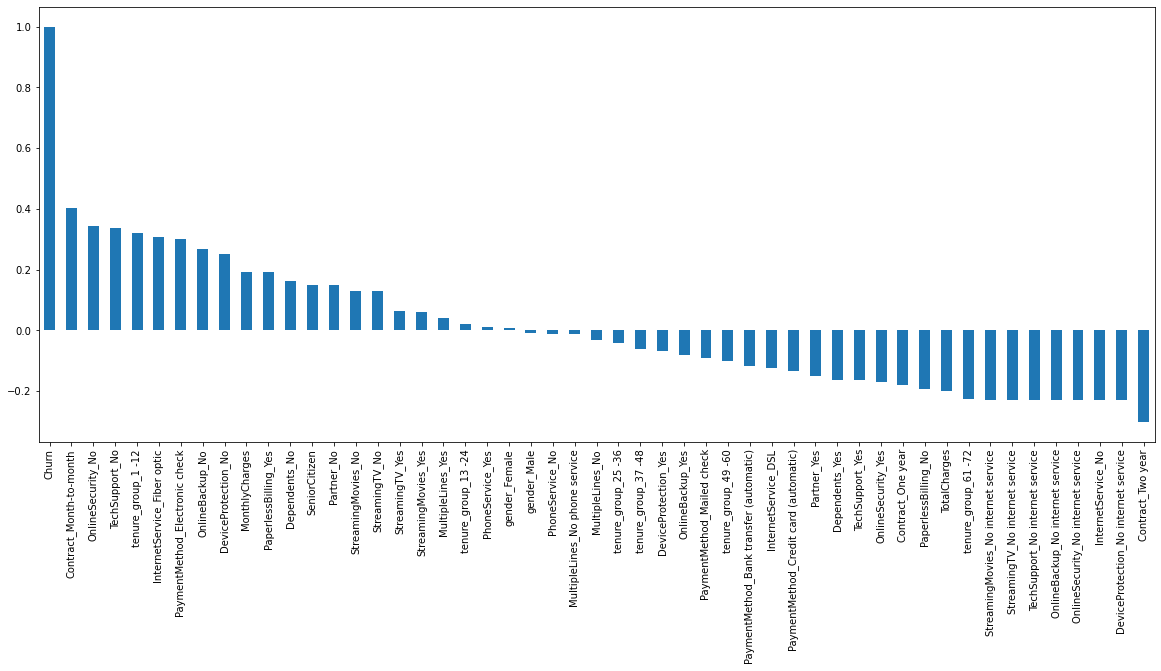

In [28]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

HIGH Churn seen in case of Month to month contracts,No online security,No Tech support,First year of subcription and Fiber Optics Internet

LOW Churn is seens in case of Long term contracts,Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender,Availability of PhoneService and of multiple lines have almost NO impact on Churn.

<AxesSubplot:>

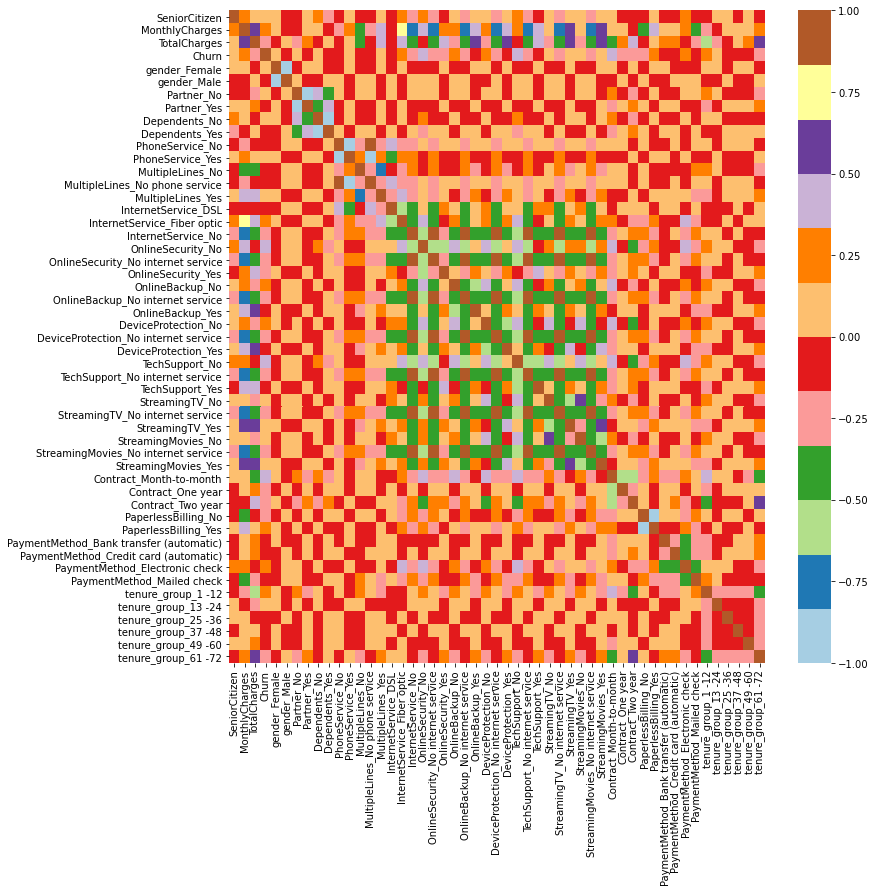

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(),cmap='Paired')

# Model Building

In [30]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#Creating x and y variable
x= df_dummies.drop('Churn',axis=1)
y= df_dummies['Churn']

In [32]:
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 -12,tenure_group_13 -24,tenure_group_25 -36,tenure_group_37 -48,tenure_group_49 -60,tenure_group_61 -72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [33]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [34]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

# Decision Tree Classifier

In [35]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1009
           1       0.66      0.52      0.58       398

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

[[903 106]
 [193 205]]


# random Forest Classifier

In [36]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1009
           1       0.66      0.42      0.52       398

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407

[[923  86]
 [230 168]]


# KNeighbors Classifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1009
           1       0.60      0.45      0.52       398

    accuracy                           0.76      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407

[[892 117]
 [219 179]]


In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
#Cross val score of dtc
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7912390900607711


In [40]:
#cross val score of rfc
print(cross_val_score(rfc,x,y,cv=5).mean())

0.78754217128137


In [41]:
#cross val score of knn
print(cross_val_score(knn,x,y,cv=5).mean())

0.7595271963693015


least difference of cross val and accuracy in Random Forest Classifier. so our best model is Random Forest Classifier.

# Hyper parameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
#finding best parameter for rfc
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'max_leaf_nodes':np.arange(2,10),
           'max_features':['auto','sqrt','log2']}

In [46]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [47]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [48]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9}

In [50]:
from sklearn.metrics import accuracy_score
#Final_mod
Final_mod = RandomForestClassifier(criterion='gini',max_depth=6,max_features='log2',max_leaf_nodes=7)
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

77.61194029850746


In [51]:
#Accuracy score on test data
x_test_prediction = rfc.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [52]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.775408670931059


# AUC-ROC Curve

In [53]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [54]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [55]:
y_pred_prob

array([0.59, 0.29, 0.25, ..., 0.  , 0.  , 0.05])

In [56]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [57]:
fpr

array([0.        , 0.00198216, 0.00198216, 0.00297324, 0.00297324,
       0.00396432, 0.00396432, 0.00792864, 0.00792864, 0.00891972,
       0.0099108 , 0.01090188, 0.01090188, 0.01090188, 0.01189296,
       0.01189296, 0.01387512, 0.0148662 , 0.01585728, 0.01585728,
       0.01684836, 0.01684836, 0.01883053, 0.02081269, 0.02081269,
       0.02378593, 0.02378593, 0.02378593, 0.02477701, 0.02576809,
       0.02576809, 0.02775025, 0.02874133, 0.02874133, 0.03072349,
       0.03171457, 0.03171457, 0.03567889, 0.03666997, 0.03666997,
       0.03666997, 0.03865213, 0.04162537, 0.04459861, 0.04558969,
       0.04757185, 0.04856293, 0.05153617, 0.05153617, 0.05351833,
       0.05847374, 0.05946482, 0.06342914, 0.06342914, 0.06838454,
       0.07135778, 0.07234886, 0.07730426, 0.07730426, 0.08126858,
       0.08225966, 0.0852329 , 0.0852329 , 0.08721506, 0.09514371,
       0.10208127, 0.10307235, 0.10505451, 0.11000991, 0.11595639,
       0.11595639, 0.11892963, 0.11992071, 0.12685828, 0.13082

In [58]:
tpr

array([0.        , 0.00502513, 0.01507538, 0.02261307, 0.02763819,
       0.03768844, 0.04522613, 0.04522613, 0.05025126, 0.05778894,
       0.05778894, 0.07035176, 0.07286432, 0.07788945, 0.08040201,
       0.08291457, 0.0879397 , 0.0879397 , 0.09296482, 0.09547739,
       0.10050251, 0.10301508, 0.11809045, 0.13316583, 0.14070352,
       0.15577889, 0.15829146, 0.16582915, 0.17085427, 0.17085427,
       0.1758794 , 0.18090452, 0.18844221, 0.19095477, 0.20603015,
       0.21859296, 0.22613065, 0.24371859, 0.24371859, 0.25376884,
       0.25628141, 0.26130653, 0.27386935, 0.28894472, 0.28894472,
       0.29396985, 0.29396985, 0.30904523, 0.31155779, 0.3241206 ,
       0.32914573, 0.33417085, 0.34170854, 0.34422111, 0.34924623,
       0.3718593 , 0.3718593 , 0.37939698, 0.38190955, 0.38693467,
       0.38693467, 0.4120603 , 0.42211055, 0.43718593, 0.44472362,
       0.45979899, 0.45979899, 0.47487437, 0.48994975, 0.50753769,
       0.51256281, 0.52512563, 0.52512563, 0.54020101, 0.55025

In [59]:
thresholds

array([1.99      , 0.99      , 0.98      , 0.97      , 0.96      ,
       0.95      , 0.94      , 0.93      , 0.92      , 0.91      ,
       0.90333333, 0.9       , 0.89      , 0.88      , 0.87      ,
       0.86833333, 0.86      , 0.85333333, 0.85      , 0.8425    ,
       0.84      , 0.83833333, 0.82      , 0.81      , 0.8       ,
       0.79      , 0.78      , 0.77      , 0.75      , 0.74833333,
       0.73166667, 0.73      , 0.72      , 0.71333333, 0.71      ,
       0.7       , 0.69      , 0.68      , 0.67833333, 0.67      ,
       0.66      , 0.65      , 0.64      , 0.63      , 0.623     ,
       0.62      , 0.615     , 0.61      , 0.60666667, 0.6       ,
       0.59      , 0.58      , 0.57      , 0.567     , 0.56      ,
       0.55      , 0.54683333, 0.54      , 0.5375    , 0.53      ,
       0.52041667, 0.52      , 0.51      , 0.5       , 0.49      ,
       0.48      , 0.47666667, 0.47      , 0.46      , 0.45      ,
       0.445     , 0.44      , 0.4375    , 0.43      , 0.42   

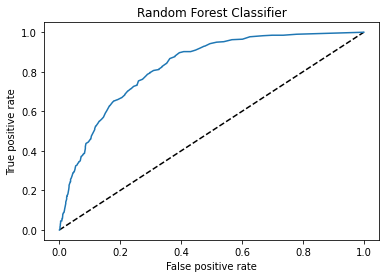

In [60]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [61]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [62]:
print(auc_score)

0.668438824449303


# Saving the model

In [63]:
import joblib
joblib.dump(Final_mod,'Customer_Churn.pkl')

['Customer_Churn.pkl']

# Loading the model

In [64]:
loaded_model = joblib.load(open('Customer_Churn.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7761194029850746
